In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import scipy
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #remove warning

In [141]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [142]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return(XTrain,XTest,yTrain,yTest)

In [143]:
def percentage_accuracy(yPred,yTest):
    return(accuracy_score(yTest, yPred))

In [144]:
def confusion_matrixp(yPred,yTest):
    return(confusion_matrix(yTest,yPred))

In [145]:
def saveAs(fileName, df):
    np.savetxt(fileName, df, delimiter=',')

In [69]:
#part1

path = "./winequality-red.csv"
df = load_dataset(path)
Class = df.columns[-1]

XTrain,XTest,yTrain,yTest = train_test(df)

train = pd.concat([XTrain,yTrain], axis=1)
test = pd.concat([XTrain,yTrain], axis=1)

saveAs('./winequality-train.csv', train)
saveAs('./winequality-test.csv', train)

In [81]:
#part2

X = df['pH'].values.reshape(-1,1)
y = df[Class].values.reshape(-1,1)

XTrain,XTest,yTrain,yTest = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()  
regressor.fit(XTrain, yTrain)

#print(regressor.intercept_)
#print(regressor.coef_)  #For retrieving the slope:

yPred = regressor.predict(XTest)
yTrainPred = regressor.predict(XTrain)

data = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPred.flatten()})

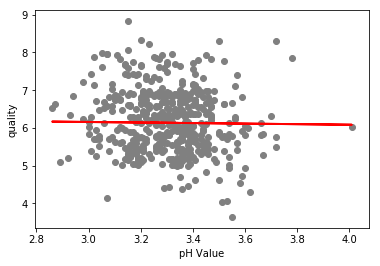

Root Mean Squared Error on Test Data: 0.8434022740015744
Root Mean Squared Error on Train Data: 0.8624300774972703


In [99]:
plt.scatter(XTest, yTest,  color='gray')
plt.xlabel("pH Value")
plt.ylabel("quality")
plt.plot(XTest, yPred, color='red', linewidth=2)
plt.show()

print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(yTest, yPred)))
print('Root Mean Squared Error on Train Data:', np.sqrt(metrics.mean_squared_error(yTrain, yTrainPred)))

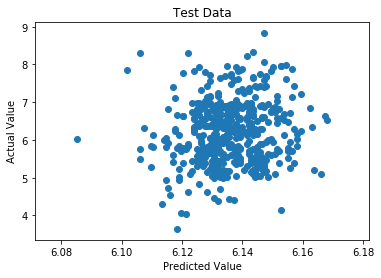

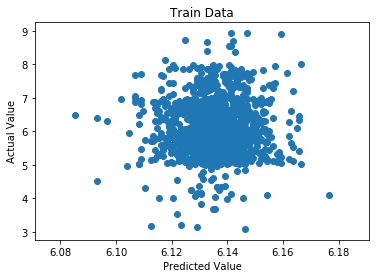

In [157]:
plt.scatter(yPred, yTest)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Test Data")
#plt.ylim([5.5,6.5])
plt.show()
plt.scatter(yTrainPred, yTrain)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Train Data")
plt.show()

In [131]:
#part3

poly = PolynomialFeatures(degree = 2) 
X_poly_train = poly.fit_transform(XTrain)
poly.fit(X_poly, yTrain)

model = LinearRegression()
model.fit(X_poly, yTrain)
y_poly_pred = model.predict(X_poly)

#rmse = np.sqrt(metrics.mean_squared_error(y,y_poly_pred))
#print(rmse)

In [139]:
yTest.shape

(480, 1)

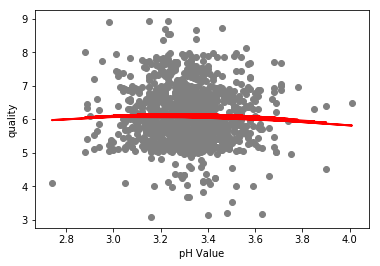

In [133]:
plt.scatter(XTrain, yTrain,  color='gray')
plt.xlabel("pH Value")
plt.ylabel("quality")
plt.plot(XTrain, y_poly_pred, color='red', linewidth=2)
plt.show()

In [146]:
#part3

poly = PolynomialFeatures(degree = 2) 
X_poly_test = poly.fit_transform(XTest)
poly.fit(X_poly, yTest)

model = LinearRegression()
model.fit(X_poly, yTest)
y_poly_pred = model.predict(X_poly)

#rmse = np.sqrt(metrics.mean_squared_error(y,y_poly_pred))
#print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [1119, 480]